In [9]:
import pandas as pd
import numpy as np
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import webbrowser
!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_confusion_matrix


In [11]:
!pip install folium
import folium
from folium import plugins

In [17]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b2bcd81b8d6d4b2d8e2e095e4b0e1a13 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Qn2Oo-PxHZr9bT6EXY2RfN-rZ9tRiVku3cgcFtYaz7e1',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_b2bcd81b8d6d4b2d8e2e095e4b0e1a13.get_object(Bucket='jupternbcapstone-donotdelete-pr-do4j5fxcc5wwfd',Key='Data-Collisions (3).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_orig = pd.read_csv(body,low_memory=False)
df_data_orig.head(2)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N


In [18]:
#Encoding Severity Code from (1/2) ->(0/1)# 2 classes only in data set
severity_code = df_data_orig['SEVERITYCODE'].values
labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)
df_data_orig["SEVERITYCODE"] = severity_code



In [19]:
#stats description
df_stats= df_data_orig.describe(include="all")
df_stats




,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,63,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1776526,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,44421,44421,NaN,NaN,187457
mean,0.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,0.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,0.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,0.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,1.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [22]:
stats_plot_b=df_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
stats_plot_b

,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
count,29805,189789,189592,189661,189503,9333,194673.000000
unique,1,4,11,9,9,1,NaN
top,Y,N,Clear,Dry,Daylight,Y,NaN
freq,29805,100274,111135,124510,116137,9333,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.298901
std,NaN,NaN,NaN,NaN,NaN,NaN,0.457778
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [23]:
#keep counts and drop remaining
stats_plot=stats_plot_b.copy()
stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)



In [24]:
stats_plot=stats_plot.transpose()

stats_plot

,count
INATTENTIONIND,29805
UNDERINFL,189789
WEATHER,189592
ROADCOND,189661
LIGHTCOND,189503
SPEEDING,9333
SEVERITYCODE,194673


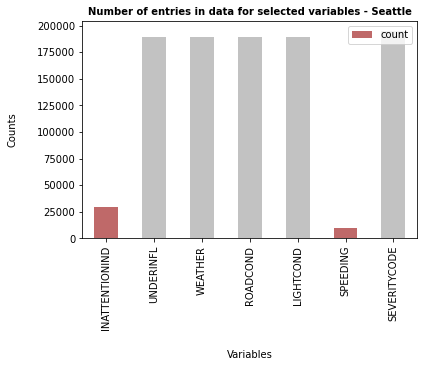

In [25]:
#Plotting counts(selected variables)
color_lst=['brown','darkgrey','darkgrey','darkgrey','darkgrey','brown','darkgrey']
stats_plot.plot(kind='bar',alpha=0.70,color=[color_lst])
plt.title('Number of entries in data for selected variables - Seattle', fontsize=10, fontweight='bold')
plt.xlabel("Variables",fontsize=10,labelpad=20)
plt.ylabel("Counts",fontsize=10,labelpad=20)
plt.xticks(rotation=90)
plt.show()

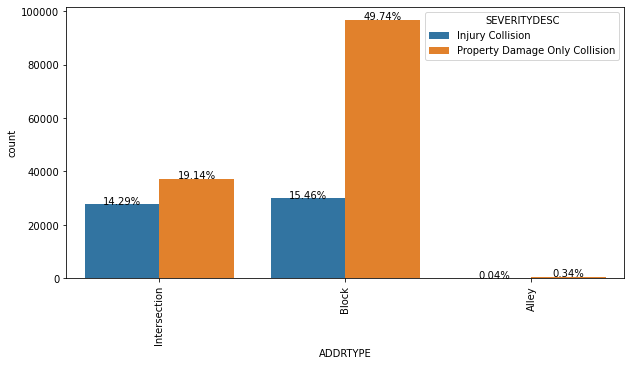

In [26]:

from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
total = float(len(df_data_orig))
ax = sns.countplot(x="ADDRTYPE", hue="SEVERITYDESC", data=df_data_orig) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:.2%}'.format(height/total),
            ha="center") 
    plt.xticks(rotation=90)
show()


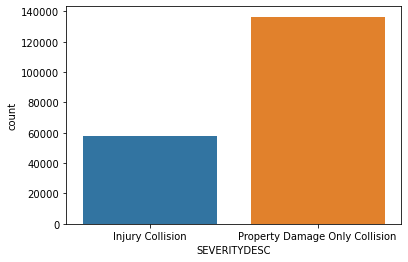

In [27]:
sns.countplot(df_data_orig["SEVERITYDESC"],data=df_data_orig)

[Text(0, 0, 'Overcast'),
 Text(0, 0, 'Raining'),
 Text(0, 0, 'Clear'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Snowing'),
 Text(0, 0, 'Fog/Smog/Smoke'),
 Text(0, 0, 'Sleet/Hail/Freezing Rain'),
 Text(0, 0, 'Blowing Sand/Dirt'),
 Text(0, 0, 'Severe Crosswind'),
 Text(0, 0, 'Partly Cloudy')]

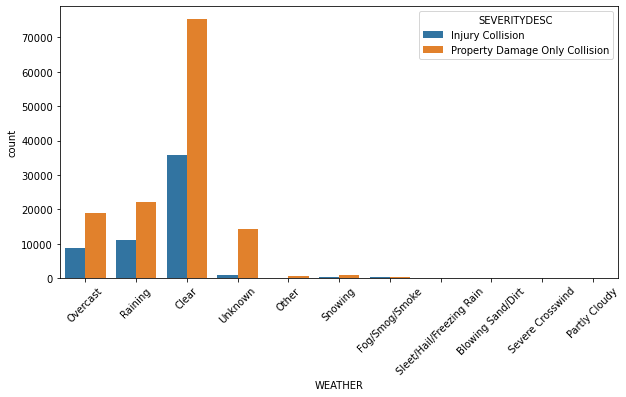

In [28]:
plt.figure(figsize=(10,5))
ax= sns.countplot(x="WEATHER", hue="SEVERITYDESC", data=df_data_orig)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

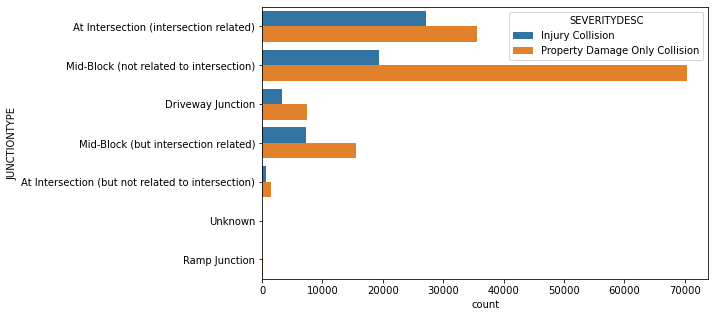

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(y="JUNCTIONTYPE", hue="SEVERITYDESC", data=df_data_orig)

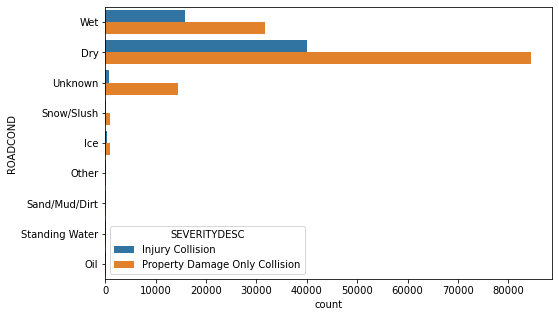

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(y="ROADCOND", hue="SEVERITYDESC", data=df_data_orig)

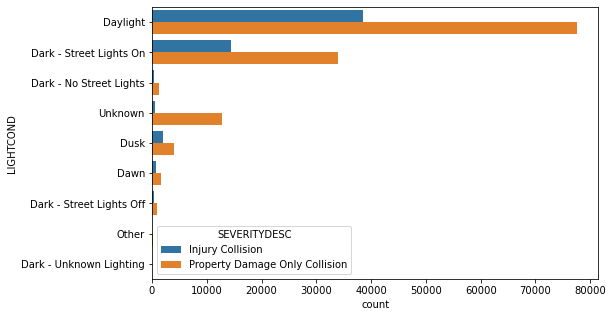

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(y="LIGHTCOND", hue="SEVERITYDESC", data=df_data_orig)

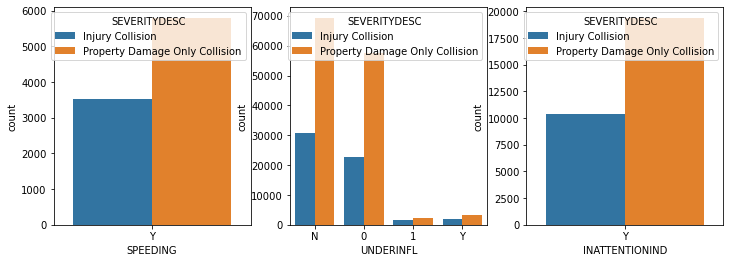

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.countplot(x="SPEEDING", hue="SEVERITYDESC", data=df_data_orig, ax=axes[0])
sns.countplot(x="UNDERINFL", hue="SEVERITYDESC", data=df_data_orig, ax=axes[1])
sns.countplot(x="INATTENTIONIND", hue="SEVERITYDESC", data=df_data_orig, ax=axes[2])

In [33]:
df_data_orig["SEVERITYCODE"].value_counts()

0    136485
1     58188
Name: SEVERITYCODE, dtype: int64

In [6]:
#from sklearn.utils import resample
#df_data_orig_maj=df_data_orig[df_data_orig.SEVERITYCODE==1]
#df_data_orig_min=df_data_orig[df_data_orig.SEVERITYCODE==2]
#df_data_orig_maj_dsample=resample(df_data_orig_maj,replace=False,n_samples=58188,random_state=123)
#frames=[df_data_orig_maj_dsample,df_data_orig_min]
#result=pd.concat(frames)
#df_data_1=pd.concat(frames)
#df_data_1=pd.concat([df_data_orig_maj_dsample],[df_data_orig_min])
#df_data_1.SEVERITYCODE.value_counts()

In [34]:
#Check IncKey unqiue numbers
df_data_orig['INCKEY'].nunique()

194673

In [35]:
#Encoding Weather Conditions(0 = Clear, 1 = Overcast & Cloudy, 2 = Windy, 3 = Rain and Snow
import numpy as np
df_data_orig["WEATHER"].value_counts()
df_data_orig["WEATHER"].replace("Clear", 0, inplace=True)
df_data_orig["WEATHER"].replace("Raining", 3, inplace=True)
df_data_orig["WEATHER"].replace("Overcast", 1, inplace=True)
df_data_orig["WEATHER"].replace("Unknown", np.nan, inplace=True)
df_data_orig["WEATHER"].replace("Snowing", 3, inplace=True)
df_data_orig["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
df_data_orig["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
df_data_orig["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
df_data_orig["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
df_data_orig["WEATHER"].replace("Partly Cloudy", 1, inplace=True)
df_data_orig["WEATHER"].replace("Other", np.nan, inplace=True)

In [36]:
#Encoding Road Conditions(0 = Dry, 1 = Snowy/Slushy/Muddy/Dirty/Sandy, 2 = Wet/Oily/Icy;Other and Unkown=nan)
df_data_orig["ROADCOND"].replace("Dry", 0, inplace=True)
df_data_orig["ROADCOND"].replace("Wet", 2, inplace=True)
df_data_orig["ROADCOND"].replace("Ice", 2, inplace=True)
df_data_orig["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
df_data_orig["ROADCOND"].replace("Other", np.nan, inplace=True)
df_data_orig["ROADCOND"].replace("Standing Water", 2, inplace=True)
df_data_orig["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
df_data_orig["ROADCOND"].replace("Oil", 2, inplace=True)
df_data_orig["ROADCOND"].replace("Unknown", np.nan, inplace=True)


In [37]:
#Encoding "in attention" (0 = N, 1 = Y.. blank values as 0)
import numpy as np
df_data_orig["INATTENTIONIND"].replace("Y", 1, inplace=True)
df_data_orig["INATTENTIONIND"].replace(np.nan, 0, inplace=True)

In [38]:
df_data_orig.head(1)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1,-122.323148,47.70314,1,1307,1307,3502005,Matched,Intersection,37475.0,...,2.0,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N


In [39]:
df_data_orig['INCKEY'].nunique() # number of unique incidents in the data set

194673

In [40]:
#Lets encode "Under the influence" columns (0 = N, 1 = Y)
df_data_orig["UNDERINFL"].replace("N", 0, inplace=True)
df_data_orig["UNDERINFL"].replace("Y", 1, inplace=True)

In [41]:
#Lets encode Speeding column(0 = No, 1 = Yes)
df_data_orig["SPEEDING"].replace("Y", 1, inplace=True)
df_data_orig["SPEEDING"].replace(np.nan, 0, inplace=True)
df_data_orig["SPEEDING"] = df_data_orig["SPEEDING"].astype(int)

In [42]:
#Lets encode Light Conditions attribute(0 = DayLight, 1 = StreetLight/Dusk/Dawn -Medium, 2 = Dark -no street lights/street lights off/unknown lightning)
df_data_orig["LIGHTCOND"].replace("Daylight", 0, inplace=True)
df_data_orig["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
df_data_orig["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
df_data_orig["LIGHTCOND"].replace("Dusk", 1, inplace=True)
df_data_orig["LIGHTCOND"].replace("Dawn", 1, inplace=True)
df_data_orig["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
df_data_orig["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
df_data_orig["LIGHTCOND"].replace("Other",np.nan, inplace=True)
df_data_orig["LIGHTCOND"].replace("Unknown",np.nan, inplace=True)

In [43]:
#new dataframe with selected data columns
df_data_1=df_data_orig[["X","Y","INCKEY","SEVERITYDESC","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
df_data_1.head(2)

,X,Y,INCKEY,SEVERITYDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,-122.323148,47.703140,1307,Injury Collision,0.0,0,1.0,2.0,0.0,0,1
1,-122.347294,47.647172,52200,Property Damage Only Collision,0.0,0,3.0,2.0,1.0,0,0


In [44]:
#print (df_data_1.isna())
#random check
df_data_1.iloc[19754,8]

nan

In [45]:
selected_df=df_data_1.copy() # copy of data frame before dropping nan values
selected_df.dropna(axis=0,how='any',inplace=True)# dataframe with selected columns and NaN values dropped



In [46]:
selected_df["LIGHTCOND"] = selected_df["LIGHTCOND"].astype(int)
selected_df["ROADCOND"] = selected_df["ROADCOND"].astype(int)
selected_df["WEATHER"] = selected_df["WEATHER"].astype(int)
selected_df["INATTENTIONIND"]=selected_df["INATTENTIONIND"].astype(int)


In [47]:
selected_df.head(2)

,X,Y,INCKEY,SEVERITYDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,-122.323148,47.703140,1307,Injury Collision,0,0,1,2,0,0,1
1,-122.347294,47.647172,52200,Property Damage Only Collision,0,0,3,2,1,0,0


In [51]:
import folium
from folium import plugins

# only show the injury record, not property collision
selected_df_map = selected_df[selected_df['SEVERITYCODE']==1]
# Make reduced df by selecting every 20th record
reduced_df = selected_df_map.iloc [0::20, 0:]

seattle_map = folium.Map(location=[47.61536892, -122.3302243], zoom_start=10)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(reduced_df.Y, reduced_df.X, reduced_df.SEVERITYCODE):
    folium.Marker(
    location=[lat, lng],
    icon=None,
    popup=label,
    ).add_to(incidents)

seattle_map.add_child(incidents)

# display map
seattle_map



In [73]:
#Machine learning Feature Sets
X=selected_df[["SPEEDING","INATTENTIONIND","UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y=selected_df[["SEVERITYCODE"]].values

In [74]:
#Test/Train split
X_train_orig, X_test, y_train_orig, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set is as :', X_train_orig.shape,  y_train_orig.shape)
print ('Test set is as :', X_test.shape,  y_test.shape)

Train set is as : (116351, 6) (116351, 1)
Test set is as : (49866, 6) (49866, 1)


In [256]:
#Data Balancing is required as  the number of rows in class 1 is almost three times bigger than the number of rows in class 2. 

In [76]:
# Balance the training data
os = SMOTE (random_state=0)
X_train, y_train= os.fit_sample(X_train_orig, y_train_orig.ravel())


In [77]:
print ('Train set is as :', X_train.shape,  y_train.shape)
print ('Test set is as :', X_test.shape,  y_test.shape)

Train set is as : (156058, 6) (156058,)
Test set is as : (49866, 6) (49866, 1)


In [78]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## Decision Tree Classifier

In [79]:
#train the model
from sklearn.tree import DecisionTreeClassifier

dtModel = DecisionTreeClassifier(criterion='entropy', max_depth=9)
dtModel.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=9)

[[22241 11233]
 [10008  6384]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.68     33474
           1       0.36      0.39      0.38     16392

    accuracy                           0.57     49866
   macro avg       0.53      0.53      0.53     49866
weighted avg       0.58      0.57      0.58     49866



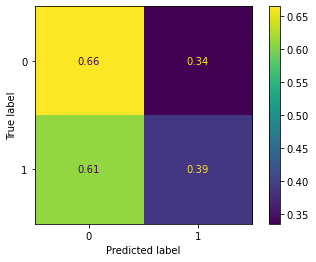

In [80]:
# # Confusion Matrix and report - Test data
yHat_test = dtModel.predict(X_test)
print(confusion_matrix(y_test, yHat_test))
print(classification_report(y_test, yHat_test))
plot_confusion_matrix(dtModel, X_test, y_test, normalize='true')
plt.show()

In [82]:
#check metrics
print("DT Classifierjaccard score is : ",jaccard_score(y_test,yHat_test))
print("DT Classifier f1_score is : ",f1_score(y_test,yHat_test))
print("DT Classifier Accuracy score is : ", accuracy_score(y_test,yHat_test))

DT Classifierjaccard score is :  0.23109502262443438
DT Classifier f1_score is :  0.37543003322649887
DT Classifier Accuracy score is :  0.5740384229735692


# Linear Regression

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lrModel=LogisticRegression(C=0.03,solver='saga')
lrModel.fit(X_train,y_train.ravel())
lrModel

LogisticRegression(C=0.03, solver='saga')

In [84]:
lrModel_y_pred=lrModel.predict(X_test)
lrModel_y_prob=lrModel.predict_proba(X_test)
print("Logisitc Regression log_loss is : ",log_loss(y_test,lrModel_y_prob))
print("Logisitc Regression jaccard_score is : ",jaccard_score(y_test,lrModel_y_pred))
print("Logisitc Regression f1_score is : ",f1_score(y_test,lrModel_y_pred,average='macro'))
print("Logisitc Regression Accuracy score is : ", accuracy_score(y_test,lrModel_y_pred))


Logisitc Regression log_loss is :  0.6901231272239717
Logisitc Regression jaccard_score is :  0.22501923711113553
Logisitc Regression f1_score is :  0.5241840261423472
Logisitc Regression Accuracy score is :  0.5758633136806642


[[22575 10899]
 [10251  6141]]
              precision    recall  f1-score   support

           0       0.69      0.67      0.68     33474
           1       0.36      0.37      0.37     16392

    accuracy                           0.58     49866
   macro avg       0.52      0.52      0.52     49866
weighted avg       0.58      0.58      0.58     49866



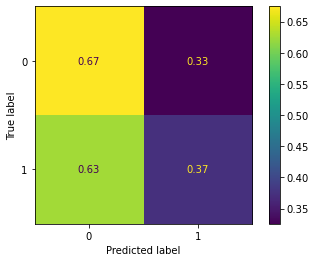

In [85]:
#LR Visualization

print(confusion_matrix(y_test, lrModel_y_pred))
print(classification_report(y_test, lrModel_y_pred))

plot_confusion_matrix(lrModel, X_test, y_test, normalize='true')
plt.show()

# KNN

In [86]:
acc=[]
for k in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.ravel())
    knn_y_predict=knn.predict(X_test)
    w=metrics.accuracy_score(knn_y_predict,y_test)
    print("k:",k)
    print("w is {:.3f}".format(w))
    acc.append(w)
print("acc is ",acc)

k: 1
w is 0.542
k: 2
w is 0.577
k: 3
w is 0.451
k: 4
w is 0.577
k: 5
w is 0.451
k: 6
w is 0.627
k: 7
w is 0.568
k: 8
w is 0.635
k: 9
w is 0.630
k: 10
w is 0.647
k: 11
w is 0.581
k: 12
w is 0.652
k: 13
w is 0.649
k: 14
w is 0.652
acc is  [0.5420928087273894, 0.5774074519712831, 0.45138972446155695, 0.5774275057153171, 0.4507480046524686, 0.6273813821040388, 0.5679220310431957, 0.6354630409497454, 0.6295471864597121, 0.6466530301207235, 0.5812778245698472, 0.6523081859383146, 0.649239963101111, 0.6522480247062127]


Text(0, 0.5, 'acc')

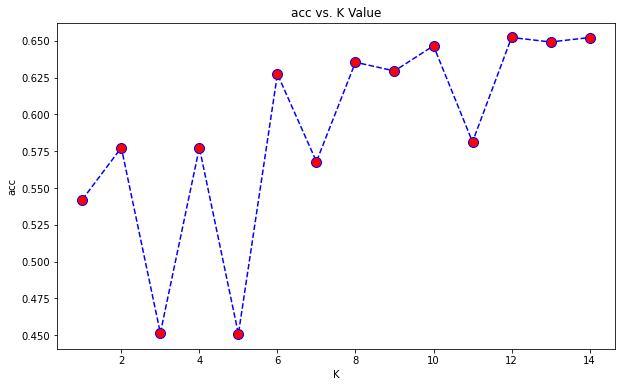

In [173]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),acc,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('acc vs. K Value')
plt.xlabel('K')
plt.ylabel('acc')

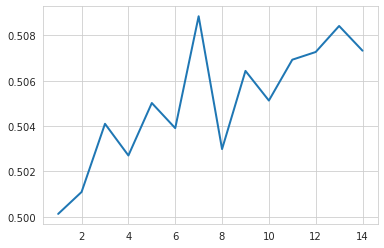

In [174]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Find the best K between 1 an 15
grid_params = {'n_neighbors': [i for i in range(1, 15)]}
grid = GridSearchCV(KNeighborsClassifier(),grid_params,cv = 5)
grid_results = grid.fit(X_train, y_train)

# visualize
sns.set_style("whitegrid")
sns.lineplot(grid_params['n_neighbors'], grid_results.cv_results_['mean_test_score'], palette="hls", linewidth=2)

In [177]:
print("The best n_neighbors was  : ", grid_results.best_params_['n_neighbors'])
print("The best accuracy was with:", grid_results.best_score_.round(2))

The best n_neighbors was  :  7
The best accuracy was with: 0.51


In [292]:
#using best k
k=7 #odd
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train.ravel())
knn_y_predict=knn.predict(X_test)
print("KNN jaccard_score is : ",jaccard_score(y_test,knn_y_predict))
print("KNN f1_score is : ",f1_score(y_test,knn_y_predict,average='weighted'))
print("KNN Accuracy score is : ",accuracy_score(y_test,knn_y_predict))

KNN jaccard_score is :  0.16585365853658537
KNN f1_score is :  0.5570529088202246
KNN Accuracy score is :  0.5679220310431957


[[24036  9438]
 [12108  4284]]
              precision    recall  f1-score   support

           0       0.67      0.72      0.69     33474
           1       0.31      0.26      0.28     16392

    accuracy                           0.57     49866
   macro avg       0.49      0.49      0.49     49866
weighted avg       0.55      0.57      0.56     49866



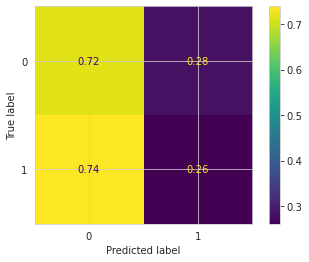

In [293]:

print(confusion_matrix(y_test, knn_y_predict))
print(classification_report(y_test, knn_y_predict))

plot_confusion_matrix(knn, X_test, y_test, normalize='true')
plt.show()